In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 随即生成样本数据，二分类问题，每个类别5000个样本
np.random.seed(12)
num_observations = 5000

In [3]:
x1 = np.random.multivariate_normal([0, 0], [[1, .75], [.75, 1]], num_observations)
print(x1.shape)
print(x1)

(5000, 2)
[[-0.2015173  -0.68335816]
 [ 0.37451947 -0.82808223]
 [-0.16189468 -1.24710655]
 ...
 [ 0.68358239  0.32790575]
 [-1.18059621 -1.24839032]
 [ 0.05648586  0.10506597]]


In [4]:
x2 = np.random.multivariate_normal([1, 4], [[1, .75], [.75, 1]], num_observations)
print(x2.shape)
print(x2)

(5000, 2)
[[-0.71536626  3.19335079]
 [ 0.50565017  3.87254139]
 [ 2.17195684  5.25131939]
 ...
 [ 2.32559622  4.18132864]
 [ 0.24707288  4.22940428]
 [ 1.71902244  4.82535048]]


In [5]:
X = np.vstack((x1, x2)).astype(np.float32)
print(X.shape)
print(X)

(10000, 2)
[[-0.2015173  -0.6833582 ]
 [ 0.37451947 -0.8280822 ]
 [-0.16189468 -1.2471066 ]
 ...
 [ 2.3255963   4.181329  ]
 [ 0.24707289  4.2294044 ]
 [ 1.7190224   4.8253503 ]]


In [6]:
y = np.hstack((np.zeros(num_observations), np.ones(num_observations)))
print(y.shape)
print(y)

(10000,)
[0. 0. 0. ... 1. 1. 1.]


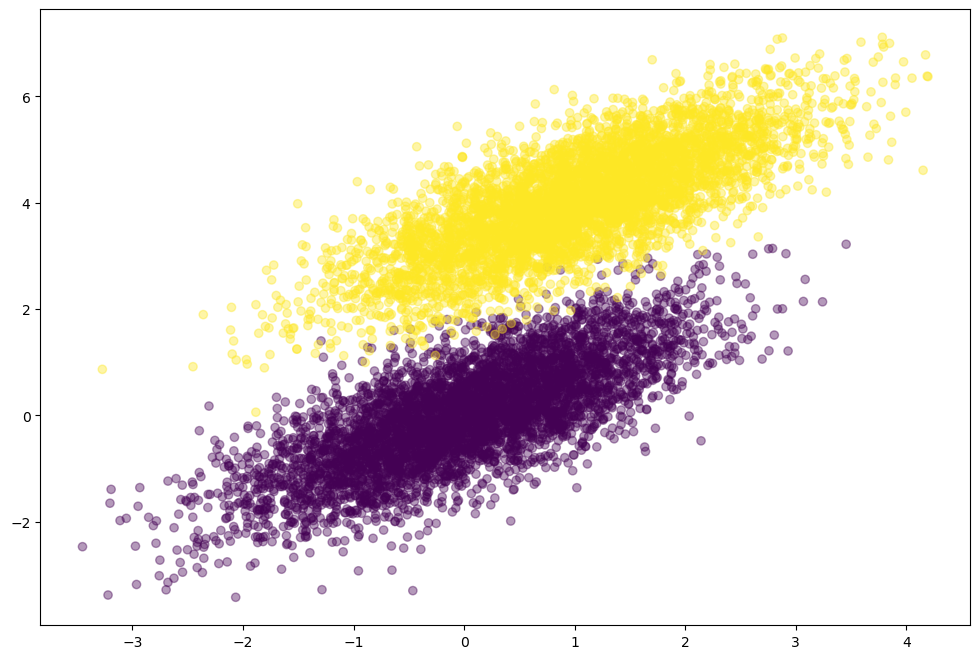

In [7]:
# 数据的可视化
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=.4)
plt.show()

In [8]:
# 实现 sigmoid 函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
# 计算 log likelihood
def log_likelihood(X, y, w, b):
    """
    针对所有样本，计算（负的） log likelihood, 也叫做 cross-entropy loss
    这个值越小越好
    X: 训练数据（特征向量）， N * D
    y: 训练数据（标签），一维向量，长度 N
    w: 模型的参数，一维向量，长度 D
    b: 模型的偏移量，标量
    """

    # 按照标签来提取正样本和负样本的下标
    pos, neg = np.where(y == 1), np.where(y == 0)

    # 正样本计算loss
   #1*1       1*1    pos*1  pos*1          pos*D  D*1   1*1
    pos_sum = np.sum(np.log(sigmoid(np.dot(X[pos], w) + b)))
    # 负样本计算loss
   #1*1       1*1    neg*1  1*1 neg*1          neg*D   D*1  1*1
    neg_sum = np.sum(np.log(1 - sigmoid(np.dot(X[neg], w) + b)))

    return -(pos_sum + neg_sum)

In [10]:
def logistic_regression(X, y, num_steps, learning_rate):
    """
    基于梯度下降法实现逻辑回归模型
    X: 训练数据（特征向量）, N * D
    y: 训练数据（标签）, 一维的向量，长度为 D
    num_steps: 梯度下降法的迭代次数
    learning_rate: 步长
    """
   #D*1 1*1
    w, b = np.zeros(X.shape[1]), 0
    for step in range(num_steps):
       #N*1     N*1           N*D D*1 1*1  N*1
        error = sigmoid(np.dot(X, w) + b) - y

        # 对w, b 的梯度计算
       # D*1               D*N   N*1
        grad_w = np.matmul(X.T, error)
       # 1*1            N*1 
        grad_b = np.sum(error)

        # 对w, b 的梯度更新
    #  D*1 D*1   1*1            D*1
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b

        # 每隔一段时间，计算 log likelihood, 看看有没有变化
        # 正常情况下，它会慢慢变小， 最后收敛
        if step % 10000 == 0:
            print(log_likelihood(X, y, w, b))

    return w, b

In [11]:
w, b = logistic_regression(X, y, num_steps=100000, learning_rate=5e-5)
print("(自己写的)逻辑回归的参数w, b分别为: ", w, b)

4346.264779152365
148.7067227680535
142.9649362310784
141.54530307157364
141.06031965930805
140.87031585891611
140.7902591275381
140.75505002269912
140.73914503180953
140.73183498915876
(自己写的)逻辑回归的参数w, b分别为:  [-5.03280465  8.24664683] -14.01785649748943


In [12]:
# 调用 sklearn 模块，对比结果
from sklearn.linear_model import LogisticRegression

In [13]:
# C 设置一个很大的值，意味着不想加入正则项
clf = LogisticRegression(fit_intercept=True, C=1e15)
clf.fit(X, y)
print("(sklearn)逻辑回归的参数w, b分别为: ", clf.coef_, clf.intercept_, )

(sklearn)逻辑回归的参数w, b分别为:  [[-5.05902155  8.28959202]] [-14.09231079]
